In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [66]:
df=pd.read_excel("C:/Users/Yash/Desktop/DS/SLR/Admission.xlsx")
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


2.Summarize important observations from the data set 
    Some pointers which would help you, but don’t be limited by these


a.	What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)

b.Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category

In [67]:
## a

In [68]:
df.shape

(391, 19)

There are 19 columns and 391 rows in the dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
SlNo                   391 non-null int64
Gender                 391 non-null object
Percent_SSC            391 non-null float64
Board_SSC              391 non-null object
Percent_HSC            391 non-null float64
Board_HSC              391 non-null object
Stream_HSC             391 non-null object
Percent_Degree         391 non-null float64
Course_Degree          391 non-null object
Experience_Yrs         391 non-null int64
Entrance_Test          324 non-null object
Percentile_ET          391 non-null float64
Percent_MBA            391 non-null float64
Specialization_MBA     391 non-null object
Marks_Communication    391 non-null int64
Marks_Projectwork      391 non-null int64
Marks_BOCA             391 non-null int64
Placement              391 non-null object
Salary                 391 non-null int64
dtypes: float64(5), int64(6), object(8)
memory usage: 58.1+ KB


In [70]:
numerical_cols = df.select_dtypes(include="number").columns
print('There are',len(numerical_cols),'numeric columns')

There are 11 numeric columns


In [71]:
categorical_cols = df.select_dtypes(include="object").columns

print('There are',len(categorical_cols),'categorical columns')

There are 8 categorical columns


In [72]:
# b

In [73]:
df.describe()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,113.016223,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,1.000000,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,98.500000,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,196.000000,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,293.500000,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,391.000000,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


In [74]:
# c

In [75]:
df.dtypes.value_counts()

object     8
int64      6
float64    5
dtype: int64

3.Check for defects in the data. Perform necessary actions to ‘fix’ these defects 
Some pointers which would help you, but don’t be limited by these 


a.	Do variables have missing/null values?



b.	Do variables have outliers?



c.	Is the target variable normally distributed? If yes, rectify it.


In [76]:
#a

In [77]:
df.isnull().sum()      

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

There are 67 missing values in column Entrance_Test.

In [78]:
df["Entrance_Test"]=df["Entrance_Test"].fillna(df["Entrance_Test"].mode()[0])

In [79]:
df.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

Missing values filled by mode.

In [80]:
#b

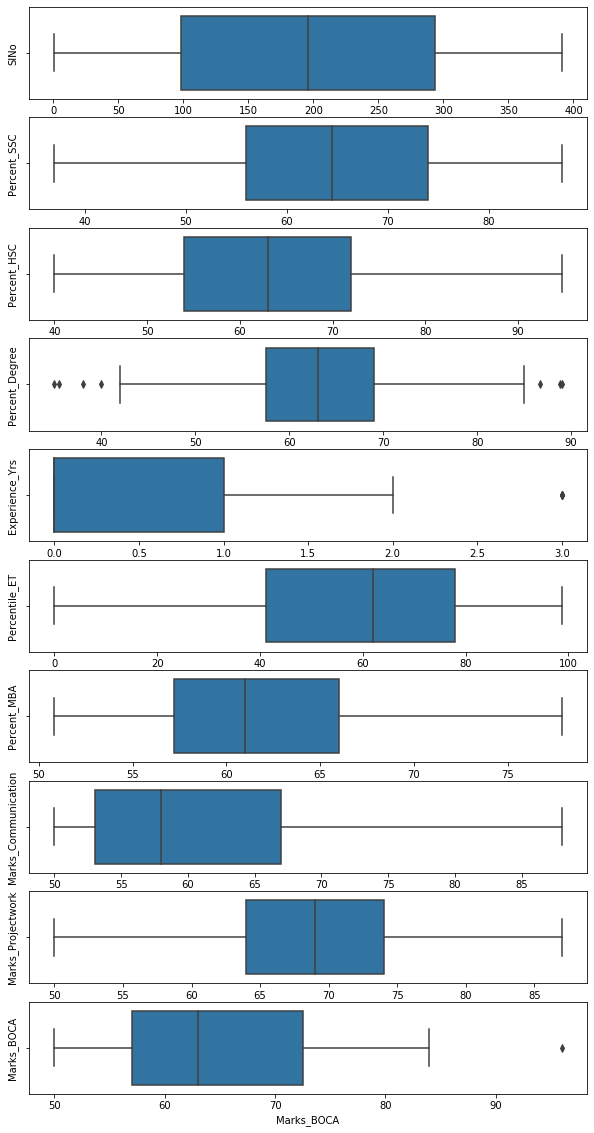

In [81]:
X = df.drop('Salary', axis=1)
y = df['Salary']
num_cols = X.select_dtypes(include="number").columns
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
   plt.subplot(10,1,i)
   sns.boxplot(X[col])
   plt.ylabel(col)
plt.show()

There are few outliers.

In [82]:
#c

In [83]:
df = df[df['Salary']>0]

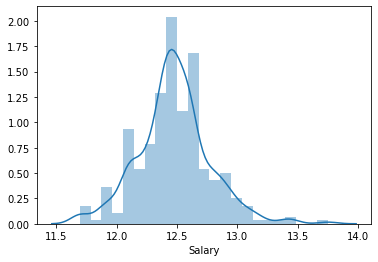

In [84]:
sns.distplot(np.log(df["Salary"]))

Yes it is normally distributed.

4.Summarize relationships among variables             

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


In [85]:
#a

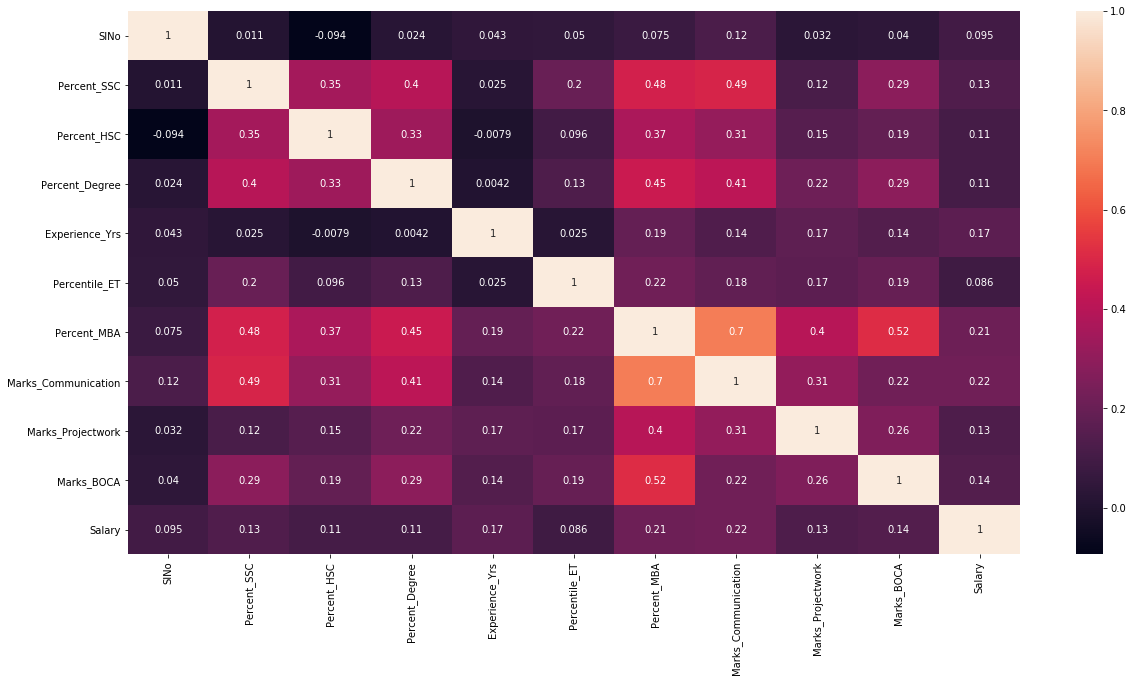

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

From the above heatmap Percent_MBA and Marks_Communication are highly corelated

Marks_communication and Percent_MBA are corelated with dependent variable Salary.

we can remove columns Percent_Degree,  Percent_HSC, slNo  Percentile_Et.


In [87]:
#b

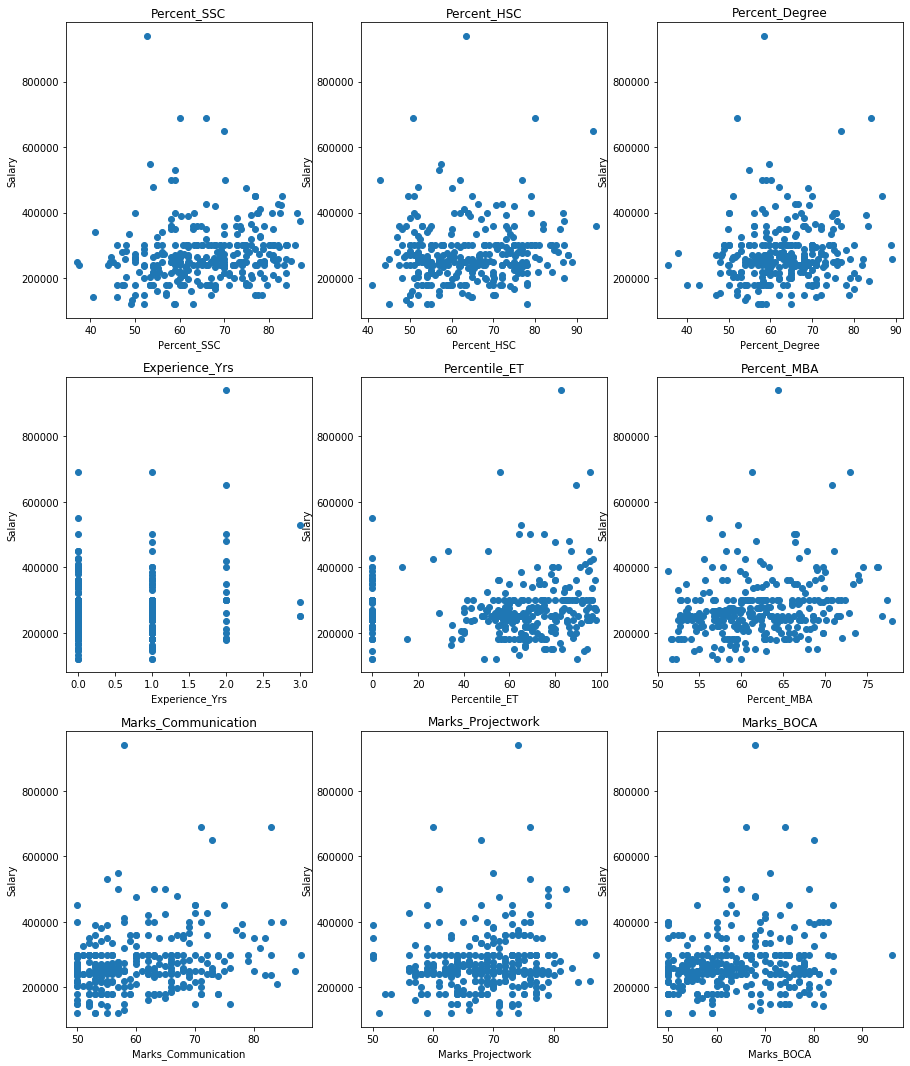

In [88]:
# plotting all the dependent variables with target variable
# plotting scatter plot of continous variable with target variable
num_cols=['Percent_SSC', 'Percent_HSC', 'Percent_Degree',
      'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
      'Marks_Projectwork', 'Marks_BOCA']
q=1
plt.figure(figsize=(15,25))
for i in num_cols:
   plt.subplot(4,3,q)
   plt.title(i)
   plt.scatter(df[i],df["Salary"])
   plt.xlabel(i)
   plt.ylabel("Salary")
   q+=1
plt.show()

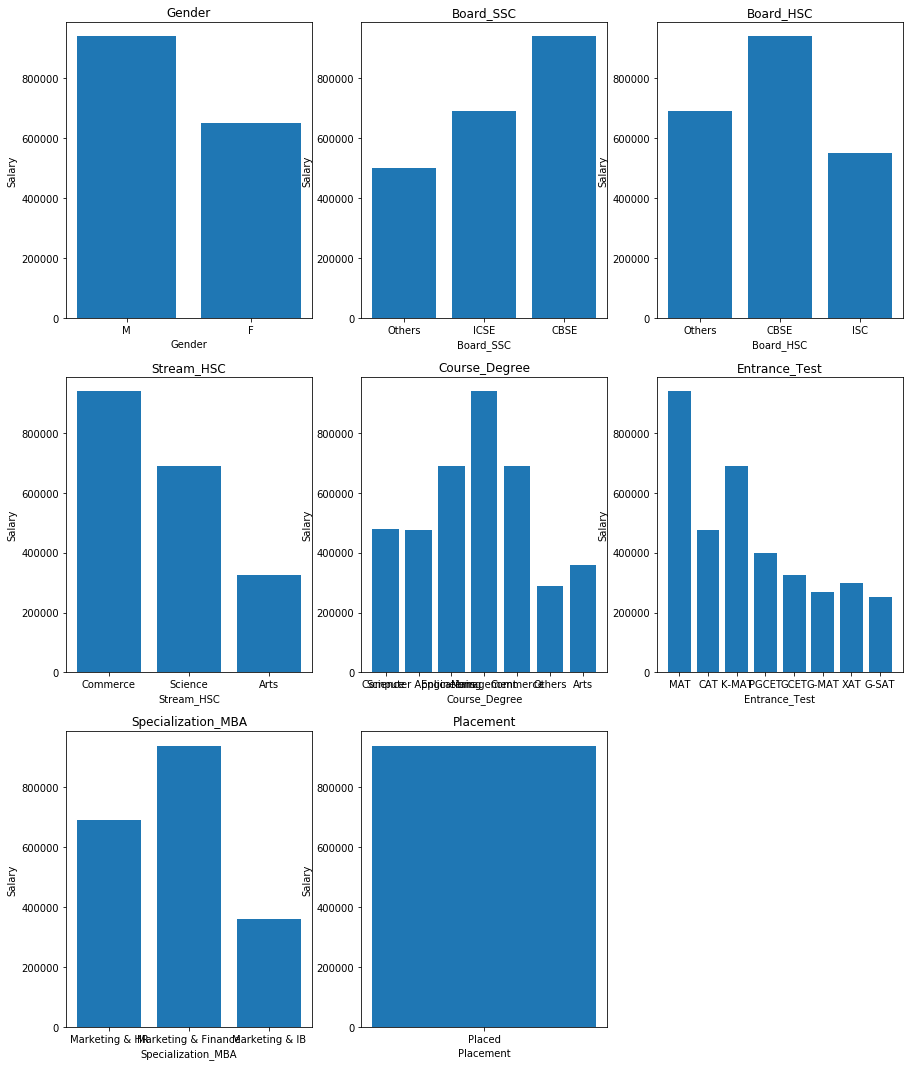

In [89]:
# plotting bar plot of continous variable with target variable
cat_cols=["Gender","Board_SSC","Board_HSC","Stream_HSC","Course_Degree","Entrance_Test","Specialization_MBA","Placement"]
q=1
plt.figure(figsize=(15,25))
for i in cat_cols:
   plt.subplot(4,3,q)
   plt.title(i)
   plt.bar(df[i],df["Salary"])
   plt.xlabel(i)
   plt.ylabel("Salary")
   q+=1
plt.show()

All variables showing linear relation.

5.Split dataset into train and test (70:30) 
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [90]:
# converting all the dataset into numerical type by converting object columns into dummies
df=pd.get_dummies(df,columns=['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree',
     'Entrance_Test', 'Specialization_MBA','Placement'],drop_first=True)

In [91]:
df.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
0,1,62.00,88.00,52.00,0,55.0,58.80,50,65,74,270000,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,2,76.33,75.33,75.48,1,86.5,66.28,69,70,75,200000,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,72.00,78.00,66.63,0,0.0,52.91,50,61,59,240000,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,4,60.00,63.00,58.00,0,75.0,57.80,54,66,62,250000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,61.00,55.00,54.00,1,66.0,59.43,52,65,67,180000,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [92]:
df.drop('SlNo',axis =1,inplace=True)

In [93]:
X=df.drop('Salary', axis=1)
Y= df['Salary']

In [94]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.30 , random_state =42)
X_train.shape , Y_train.shape

((218, 31), (218,))

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, Y)}')

Coefficients: [-1.12502323e+02 -4.91562667e+01  3.24172244e+02  1.74991207e+04
 -6.90177271e+01  1.52252404e+03  1.59429356e+03 -2.47307472e+02
  7.67628242e+02  4.06989183e+04 -2.76663663e+04 -2.15740424e+04
  2.70234715e+04  7.28664569e+03  4.48955017e+04  4.24796026e+04
 -2.35741622e+04 -2.87793913e+04  7.40672613e+03 -3.77873066e+04
 -5.73443767e+04 -3.89446905e+04 -1.53164966e+04 -6.85505693e+04
 -4.45281496e+04  2.12717513e+04 -4.29542775e+04 -1.53670173e+04
 -2.06504197e+04 -2.65948841e+04 -2.04080661e+04]
Intercept: 49641.77082806977
R^2 score: 0.22645869942381955


In [97]:
import statsmodels.api as sm

In [98]:
Xc = sm.add_constant(X)
lin_reg_ols = sm.OLS(Y,Xc).fit()
lin_reg_ols.summary()

C:\Users\Yash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.644
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.40e-05
Time:                        14:08:42   Log-Likelihood:                -3972.7
No. Observations:                 312   AIC:                             8009.
Df Residuals:                     280   BIC:                             8129.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.964e+04   8.53e+04      0.582      0.561   -1.18e+05    2.17e+05
Percent_SSC                          -112.5023    629.914     -0.179      0.858   -1352.471    1127.467
Percent_HSC                           -49.1563    601.843     -0.082      0.935   -1233.867    1135.555
Percent_Degree                        324.1722    719.922      0.450      0.653   -1092.975    1741.320
Experience_Yrs                        1.75e+04   7913.857      2.211      0.028    1920.911    3.31e+04
Percentile_ET                         -69.0177    174.690     -0.395      0.693    -412.890     274.854
Percent_MBA                          1522.5240   1526.552      0.997      0.319   -1482.452    4527.500
Marks_Communication                  1594.2936    856.753      1.861      0.064     -92.202    3280.789
Marks_Projectwork                    -247.3075    817.187     -0.303      0.762   -1855.918    1361.303
Marks_BOCA                            767.6282    635.112      1.209      0.228    -482.571    2017.828
Gender_M                              4.07e+04   1.21e+04      3.374      0.001     1.7e+04    6.44e+04
Board_SSC_ICSE                      -2.767e+04   1.95e+04     -1.420      0.157    -6.6e+04    1.07e+04
Board_SSC_Others                    -2.157e+04   1.66e+04     -1.297      0.196   -5.43e+04    1.12e+04
Board_HSC_ISC                        2.702e+04   2.22e+04      1.218      0.224   -1.67e+04    7.07e+04
Board_HSC_Others                     7286.6457   1.67e+04      0.438      0.662   -2.55e+04    4.01e+04
Stream_HSC_Commerce                   4.49e+04   2.94e+04      1.529      0.127   -1.29e+04    1.03e+05
Stream_HSC_Science                   4.248e+04   3.08e+04      1.381      0.168   -1.81e+04    1.03e+05
Course_Degree_Commerce              -2.357e+04    3.5e+04     -0.673      0.501   -9.25e+04    4.54e+04
Course_Degree_Computer Applications -2.878e+04   3.77e+04     -0.763      0.446   -1.03e+05    4.54e+04
Course_Degree_Engineering            7406.7261   3.59e+04      0.206      0.837   -6.32e+04    7.81e+04
Course_Degree_Management            -3.779e+04   3.29e+04     -1.147      0.252   -1.03e+05     2.7e+04
Course_Degree_Others                -5.734e+04   5.41e+04     -1.060      0.290   -1.64e+05    4.91e+04
Course_Degree_Science               -3.894e+04   3.73e+04     -1.045      0.297   -1.12e+05    3.44e+04
Entrance_Test_G-MAT                 -1.532e+04   9.11e+04     -0.168      0.867   -1.95e+05    1.64e+05
Entrance_Test_G-SAT                 -6.855e+04   9.33e+04     -0.735      0.463   -2.52e+05    1.15e+05
Entrance_Test_GCET                  -4.453e+04   6.83e+04     -0.652      0.515   -1.79e+05       9e+04
Entrance_Test_K-MAT                  2.127e+04   2.95e+04      0.72

In [99]:
from scipy.stats import ttest_1samp

In [100]:
print('train',ttest_1samp(Y_train,df.Salary.mean()))
print('test',ttest_1samp(Y_test,df.Salary.mean()))

train Ttest_1sampResult(statistic=-1.1097924625045934, pvalue=0.26831678064859943)
test Ttest_1sampResult(statistic=1.0671967478176785, pvalue=0.28864552390224174)


6. Fit a base model. Please write your key observations 


a.	What is the overall R2? Please comment on whether it is good or not. 




 
b.	Do the prediction using test data and add the predicted values as a new column to your dataframe.




c.	Which variables are significant?
 



d.	Is there multi-collinearity?




e.	What are the RMSE and MAPE values of the model? 


In [101]:
#a

In [102]:
Xc = sm.add_constant(X)
lin_reg_ols = sm.OLS(Y,Xc).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.644
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.40e-05
Time:                        14:08:42   Log-Likelihood:                -3972.7
No. Observations:                 312   AIC:                             8009.
Df Residuals:                     280   BIC:                             8129.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.964e+04   8.53e+04      0.582      0.561   -1.18e+05    2.17e+05
Percent_SSC                          -112.5023    629.914     -0.179      0.858   -1352.471    1127.467
Percent_HSC                           -49.1563    601.843     -0.082      0.935   -1233.867    1135.555
Percent_Degree                        324.1722    719.922      0.450      0.653   -1092.975    1741.320
Experience_Yrs                        1.75e+04   7913.857      2.211      0.028    1920.911    3.31e+04
Percentile_ET                         -69.0177    174.690     -0.395      0.693    -412.890     274.854
Percent_MBA                          1522.5240   1526.552      0.997      0.319   -1482.452    4527.500
Marks_Communication                  1594.2936    856.753      1.861      0.064     -92.202    3280.789
Marks_Projectwork                    -247.3075    817.187     -0.303      0.762   -1855.918    1361.303
Marks_BOCA                            767.6282    635.112      1.209      0.228    -482.571    2017.828
Gender_M                              4.07e+04   1.21e+04      3.374      0.001     1.7e+04    6.44e+04
Board_SSC_ICSE                      -2.767e+04   1.95e+04     -1.420      0.157    -6.6e+04    1.07e+04
Board_SSC_Others                    -2.157e+04   1.66e+04     -1.297      0.196   -5.43e+04    1.12e+04
Board_HSC_ISC                        2.702e+04   2.22e+04      1.218      0.224   -1.67e+04    7.07e+04
Board_HSC_Others                     7286.6457   1.67e+04      0.438      0.662   -2.55e+04    4.01e+04
Stream_HSC_Commerce                   4.49e+04   2.94e+04      1.529      0.127   -1.29e+04    1.03e+05
Stream_HSC_Science                   4.248e+04   3.08e+04      1.381      0.168   -1.81e+04    1.03e+05
Course_Degree_Commerce              -2.357e+04    3.5e+04     -0.673      0.501   -9.25e+04    4.54e+04
Course_Degree_Computer Applications -2.878e+04   3.77e+04     -0.763      0.446   -1.03e+05    4.54e+04
Course_Degree_Engineering            7406.7261   3.59e+04      0.206      0.837   -6.32e+04    7.81e+04
Course_Degree_Management            -3.779e+04   3.29e+04     -1.147      0.252   -1.03e+05     2.7e+04
Course_Degree_Others                -5.734e+04   5.41e+04     -1.060      0.290   -1.64e+05    4.91e+04
Course_Degree_Science               -3.894e+04   3.73e+04     -1.045      0.297   -1.12e+05    3.44e+04
Entrance_Test_G-MAT                 -1.532e+04   9.11e+04     -0.168      0.867   -1.95e+05    1.64e+05
Entrance_Test_G-SAT                 -6.855e+04   9.33e+04     -0.735      0.463   -2.52e+05    1.15e+05
Entrance_Test_GCET                  -4.453e+04   6.83e+04     -0.652      0.515   -1.79e+05       9e+04
Entrance_Test_K-MAT                  2.127e+04   2.95e+04      0.72

Overall R-Squared value is 70.9 which is quite good.

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
print(f'R^2 score for train : {lin_reg.score(X_train, Y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, Y_test)}')
print(f'R^2 score for Overall data: {lin_reg.score(X, Y)}')

R^2 score for train : 0.30364879885648155
R^2 score for test: 0.06868516316333739
R^2 score for Overall data: 0.18928991976633647


In [104]:
#b

In [105]:
lin_reg = LinearRegression().fit(X_train,Y_train)

In [106]:
df['predictions1'] = lin_reg.predict(X)

In [107]:
df.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,predictions1
0,62.00,88.00,52.00,0,55.0,58.80,50,65,74,270000,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,222785.560248
1,76.33,75.33,75.48,1,86.5,66.28,69,70,75,200000,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,277211.915175
2,72.00,78.00,66.63,0,0.0,52.91,50,61,59,240000,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,281104.181649
3,60.00,63.00,58.00,0,75.0,57.80,54,66,62,250000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,176501.191901
4,61.00,55.00,54.00,1,66.0,59.43,52,65,67,180000,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,317074.929147


In [108]:
#c

 Based on the p-value of our OLS model (p-value < 0.05), the following features are significant:
Experience_Yrs
Gender_M
Entrance_Test_MAT
Specialization_MBA_Marketing & HR

In [109]:
#d

In [110]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('Display.max_columns',None)
vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Percent_SSC,1.934400
Percent_HSC,1.795484
Percent_Degree,1.727109
Experience_Yrs,1.188287
Percentile_ET,1.212058
Percent_MBA,3.223551
Marks_Communication,2.466608
Marks_Projectwork,1.413142
Marks_BOCA,1.610199
Gender_M,1.299818


Yes there is multicolinearity in Stream_HSC_Commerce,Course_Degree_Management,Course_Degree_Computer Applications,
Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Science.

In [111]:
#e

In [112]:
from sklearn.metrics import r2_score

In [ ]:
# itereation results
description = "OLS model with constant term"
R_squared = r2_score(Y_test,lin_reg_ols.predict(X_test))
RMSE = np.sqrt(mean_squared_error(Y_test,lin_reg_ols.predict(X_test)))

df_results = pd.concat([df_results,
pd.DataFrame(np.array([description,
            R_squared,
            RMSE]).reshape(1,-1), columns=['Description','R-squared','RMSE'])
         ], axis=0)

df_result

7..How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [ ]:
model = LinearRegression()
selector = RFECV(model,cv=5)
selector = selector.fit(X, y)
print(f"Out of {len(X.columns)} features, best number of features {selector.n_features_}")
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X.columns) + 1), selector.grid_scores_)
plt.show()

In [ ]:
model = LinearRegression(fit_intercept=False)
selector = RFECV(model,cv=5)
selector = selector.fit(X, y)
print(f"Out of {len(X.columns)} features, best number of features {selector.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X.columns) + 1), selector.grid_scores_)
print(X.columns[selector.support_].values)
plt.show()

In [ ]:
# features that are important based on RFECV
X = ['Experience_Yrs', 'Percent_MBA' ,'Gender_M' ,'Board_SSC_ICSE',
 'Board_SSC_Others', 'Board_HSC_ISC' ,'Board_HSC_Others',
 'Stream_HSC_Commerce' ,'Stream_HSC_Science' ,'Course_Degree_Commerce',
 'Course_Degree_Computer Applications' ,'Course_Degree_Engineering',
 'Course_Degree_Management' ,'Course_Degree_Others', 'Course_Degree_Science',
 'Entrance_Test_G-MAT' ,'Entrance_Test_G-SAT' ,'Entrance_Test_GCET',
 'Entrance_Test_K-MAT', 'Entrance_Test_MAT', 'Entrance_Test_PGCET',
 'Entrance_Test_XAT', 'Specialization_MBA_Marketing & HR',
 'Specialization_MBA_Marketing & IB']

In [ ]:
mask = selector.support_
#print(f"Best features according to RFE {X.columns[mask].values}")

X = X.iloc[:,mask]
# for scoring the model but in order to compare with the stats model 
# we will use the whole data
model1 = LinearRegression().fit(X,y)
print(f"R2 Score: {model1.score(X,y)}")

In [ ]:
print('MAPE :',mean_absolute_percentage_error(y,model1.predict(X)))
print('RMSE :',np.sqrt(mean_squared_error(y, model1.predict(X))))

8.Summarize as follows 
1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most effect on model performance?
4.	What are the key risks to your results and interpretation?

In [ ]:
Summarize the overall fit of the model and list down the measures to prove that it is a good model
model1 = LinearRegression().fit(X,y)
print(f"R2 Score: {model1.score(X,y)}")
The Model which is given about r2score as 0.21 is good as it performing Good at both Training and Test data.we can improve the model by Changing Number of iterations in Feature selction and feature selectinf Methods

we can still improve by Regularize the Model using Lasso and Ridge methods

2.    Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
From the Model we can interpret that

as the percent of marks in MBA is high will give Better salary
Marks obtained in Project also Increases the Salary Offered
The Model affect by different Categories of MBA Specalization
3.    What changes from the base model had the most effect on model performance?
Major changes from base model are Feature Selection
For the Improving performance of Model we can regularize the model
4.    What are the key risks to your results and interpretation?
he Effect will be the Categorical columns which we are dummified for our Model
In Model Interpretation we can see the from train,test data Model is little bit overfitting
